In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

from sklearn.model_selection import train_test_split

In [2]:
class Perceptron:
    """
    Perceptron neuron
    """

    def __init__(self, learning_rate=0.1):
        """
        instantiate a new Perceptron

        :param learning_rate: coefficient used to tune the model
        response to training data
        """
        self.learning_rate = learning_rate
        self._b = 0.0  # y-intercept
        self._w = None  # weights assigned to input features
        # count of errors during each iteration
        self.misclassified_samples = []

    def fit(self, x: np.array, y: np.array, n_iter=10):
        """
        fit the Perceptron model on the training data

        :param x: samples to fit the model on
        :param y: labels of the training samples
        :param n_iter: number of training iterations 
        """
        self._b = 0.0
        self._w = np.zeros(x.shape[1])
        self.misclassified_samples = []

        for _ in range(n_iter):
            # counter of the errors during this training iteration
            errors = 0
            for xi, yi in zip(x, y):
                # for each sample compute the update value
                update = self.learning_rate * (yi - self.predict(xi))
                # and apply it to the y-intercept and weights array
                self._b += update
                self._w += update * xi
                errors += int(update != 0.0)

            self.misclassified_samples.append(errors)

    def f(self, x: np.array) -> float:
        """
        compute the output of the neuron
        :param x: input features
        :return: the output of the neuron
        """
        return np.dot(x, self._w) + self._b

    def predict(self, x: np.array):
        """
        convert the output of the neuron to a binary output
        :param x: input features
        :return: 1 if the output for the sample is positive (or zero),
        -1 otherwise
        """
        return np.where(self.f(x) >= 0, 1, -1)


In [3]:
df = pd.read_csv("wine.csv",sep=",",engine='python')
df.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
x = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

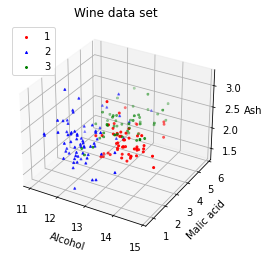

In [5]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.set_title("Wine data set")
ax.set_xlabel("Alcohol")
ax.set_ylabel("Malic acid")
ax.set_zlabel("Ash")

# plot the samples
ax.scatter(x[:59, 0], x[:59, 1], x[:59, 2], color='red', 
           marker='o', s=4, edgecolor='red', label="1")
ax.scatter(x[59:130, 0], x[59:130, 1], x[59:130, 2], color='blue', 
           marker='^', s=4, edgecolor='blue', label="2")
ax.scatter(x[130:, 0], x[130:, 1], x[130:, 2], color='green', 
           marker='x', s=4, edgecolor='green', label="3")

plt.legend(loc='upper left')
plt.show()

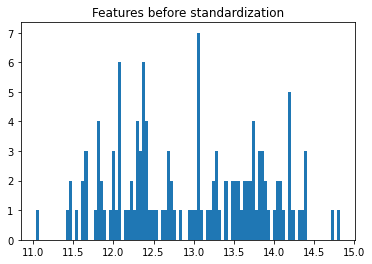

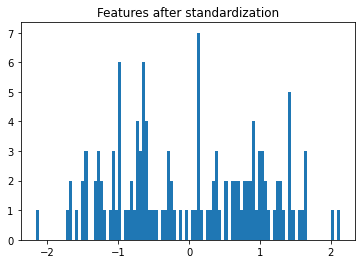

In [6]:
# 1 vs 2
x = np.concatenate([x[0:59], x[59:130]])
y = np.concatenate([y[0:59], y[59:130]])

# map the labels to a binary integer value
y = np.where(y == 1, 1, -1)

# standardization of the input features
plt.hist(x[:, 0], bins=100)
plt.title("Features before standardization")
plt.savefig("./before.png", dpi=300)
plt.show()

for i in range(13):
    x[:, i] = (x[:, i] - x[:, i].mean()) / x[:, i].std()

plt.hist(x[:, 0], bins=100)
plt.title("Features after standardization")
plt.show()

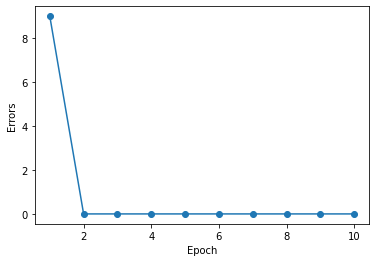

In [7]:
# split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,
                                                    random_state=0)

# train the model
classifier = Perceptron(learning_rate=0.01)
classifier.fit(x_train, y_train)

# plot the number of errors during each iteration
plt.plot(range(1, len(classifier.misclassified_samples) + 1),
         classifier.misclassified_samples, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Errors')
plt.show()
